In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
real_users = pd.read_csv('users.csv')

In [3]:
real_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [4]:
real_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1481 non-null   int64  
 1   name                                1481 non-null   object 
 2   screen_name                         1481 non-null   object 
 3   statuses_count                      1481 non-null   int64  
 4   followers_count                     1481 non-null   int64  
 5   friends_count                       1481 non-null   int64  
 6   favourites_count                    1481 non-null   int64  
 7   listed_count                        1481 non-null   int64  
 8   created_at                          1481 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                1481 non-null   object 
 11  time_zone                           1063 no

In [5]:
fake_users = pd.read_csv('fusers.csv')
fake_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [6]:
#Let's combine the two datasets 
data = pd.concat([real_users,fake_users])

In [7]:
data.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1336
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone                           1069 no

In [9]:
#label users added from real profiles as 1 and fake profiles as 0
labels = pd.DataFrame(len(fake_users)*[0] + len(real_users)*[1])

In [10]:
labels.value_counts()

1    1481
0    1337
dtype: int64

In [11]:
data['Fake_Profile'] = labels

We have 1481 real profiles and 1337 fake profiles

# Exploratory Data Analysis

In [12]:
#Let's have a look at data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1336
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone                           1069 no

In [13]:
#Profile IDs are artibitrarily assigned, we won't be using that
data.drop(['id'],axis=1,inplace=True)
data.head()

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile
0,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,...,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,0
1,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,0
2,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,...,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,0
3,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,...,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,0
4,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,...,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13,0


In [14]:
import gender_guesser.detector as gender

sex_predictor = gender.Detector(case_sensitive=False)

name = list(data['name'])
sex = []
for i in name:
    first_name = i.split(' ')[0]
    sex.append(sex_predictor.get_gender(first_name))

data['sex'] = sex

In [15]:
#Assign codes to sex
sex_dict = {'female': -2, 'mostly_female': -1,'unknown':0,'mostly_male':1, 'male': 2, 'andy':0}
data.replace(sex_dict,inplace=True)
data.drop(['name'],axis=1,inplace=True)
data.head()

,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile,sex
0,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,Rome,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,0,2
1,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,Rome,...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,0,-2
2,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,Rome,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,0,0
3,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,Rome,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,0,0
4,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,Rome,...,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13,0,2


In [16]:
data.drop(['screen_name'], axis=1, inplace = True)
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,Fake_Profile,sex
0,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,Rome,Roma,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,0,2
1,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,Rome,"Rome, Italy",...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,0,-2
2,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,Rome,Internets,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,0,0
3,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,Rome,NaN,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,0,0
4,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",...,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13,0,2


In [17]:
print('Null Values : ')
print('Status count:', data['statuses_count'].isnull().sum())
print('follower count:', data['followers_count'].isnull().sum())
print('favorite count:', data['friends_count'].isnull().sum())
print('friends count:', data['favourites_count'].isnull().sum())
print('listed count:', data['listed_count'].isnull().sum())

Null Values : 
Status count: 0
follower count: 0
favorite count: 0
friends count: 0
listed count: 0


In [18]:
# data['created_at'].value_counts()
# data['updated'].value_counts()

data['created_at']  = pd.to_datetime(data['created_at']).dt.year
data['updated'] = pd.to_datetime(data['updated']).dt.year
year_cr = list(data['created_at'])
year_up = list(data['updated'])

In [19]:
last_update = []
for i in range(len(year_cr)):
    last_update.append(year_cr[i] - year_up[i])

data['last_update'] = last_update

In [20]:
data.drop(['created_at', 'updated'], axis=1, inplace=True)

In [21]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,dataset,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,http://braddd.tumblr.com,it,Rome,Roma,NaN,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,E13,0,2,-8
1,3131,506,381,9,40,http://www.lineheight.net/,en,Rome,"Rome, Italy",NaN,...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,E13,0,-2,-8
2,4024,264,87,323,16,http://t.co/LKrl1dZE,en,Rome,Internets,NaN,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,E13,0,0,-8
3,40586,640,622,1118,32,http://alesstar.wordpress.com/,en,Rome,NaN,NaN,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",E13,0,0,-8
4,2016,62,64,13,0,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",NaN,...,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,E13,0,2,-8


In [22]:
#Let's look at url

data['url'].isnull().sum()

2355

In [23]:
data.drop(['url'],axis=1,inplace=True)

In [24]:
#Language

data['lang'].value_counts()

en    1502
it    1297
es      11
fr       3
de       2
tr       1
nl       1
gl       1
Name: lang, dtype: int64

In [25]:
#Assign numerical codes to languages
data.replace({'en':0, 'it':1, 'es':2, 'fr':3, 'de':4, 'gl':5, 'tr':6, 'nl':7},inplace=True)
data['lang'].value_counts()

0    1502
1    1297
2      11
3       3
4       2
6       1
5       1
7       1
Name: lang, dtype: int64

In [26]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,location,default_profile,default_profile_image,...,profile_background_color,profile_link_color,utc_offset,protected,verified,description,dataset,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,1,Rome,Roma,NaN,NaN,...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,E13,0,2,-8
1,3131,506,381,9,40,0,Rome,"Rome, Italy",NaN,NaN,...,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,E13,0,-2,-8
2,4024,264,87,323,16,0,Rome,Internets,NaN,NaN,...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,E13,0,0,-8
3,40586,640,622,1118,32,0,Rome,NaN,NaN,NaN,...,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",E13,0,0,-8
4,2016,62,64,13,0,1,Rome,"iPhone: 44.069630,12.569966",NaN,NaN,...,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,E13,0,2,-8


In [27]:
#drop columns with more null values and urls
data['time_zone'].isnull().sum()
data.drop(['time_zone', 'location', 'default_profile', 'default_profile_image', 'profile_background_color', 'profile_link_color', 'utc_offset', 'protected', 'verified'], axis=1, inplace=True)

In [28]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,...,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,description,dataset,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,1,NaN,http://a0.twimg.com/profile_images/1575057050/...,https://si0.twimg.com/profile_banners/3610511/...,1.0,...,https://si0.twimg.com/profile_images/157505705...,F2E195,NaN,FFF7CC,http://a0.twimg.com/profile_background_images/...,Founder of http://www.screenweek.it & http://w...,E13,0,2,-8
1,3131,506,381,9,40,0,NaN,http://a0.twimg.com/profile_images/1901298312/...,NaN,1.0,...,https://si0.twimg.com/profile_images/190129831...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,BSc degree (cum laude) in Computer Engineering...,E13,0,-2,-8
2,4024,264,87,323,16,0,NaN,http://a0.twimg.com/profile_images/1640620850/...,https://si0.twimg.com/profile_banners/5682702/...,1.0,...,https://si0.twimg.com/profile_images/164062085...,181A1E,1.0,000000,http://a0.twimg.com/profile_background_images/...,Cogito ergo bestemmio.,E13,0,0,-8
3,40586,640,622,1118,32,0,1.0,http://a0.twimg.com/profile_images/2797534662/...,https://si0.twimg.com/profile_banners/6067292/...,1.0,...,https://si0.twimg.com/profile_images/279753466...,FFFFFF,NaN,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,"Se la vita ti dà sarde, scapocciale!",E13,0,0,-8
4,2016,62,64,13,0,1,1.0,http://a0.twimg.com/profile_images/1073412966/...,NaN,1.0,...,https://si0.twimg.com/profile_images/107341296...,EEEEEE,NaN,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,Je me souviens,E13,0,2,-8


In [29]:
#Check data info again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 1336
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   statuses_count                      2818 non-null   int64  
 1   followers_count                     2818 non-null   int64  
 2   friends_count                       2818 non-null   int64  
 3   favourites_count                    2818 non-null   int64  
 4   listed_count                        2818 non-null   int64  
 5   lang                                2818 non-null   int64  
 6   geo_enabled                         721 non-null    float64
 7   profile_image_url                   2818 non-null   object 
 8   profile_banner_url                  987 non-null    object 
 9   profile_use_background_image        2760 non-null   float64
 10  profile_background_image_url_https  2818 non-null   object 
 11  profile_text_color                  2818 no

In [30]:
 data.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'lang', 'geo_enabled',
       'profile_image_url', 'profile_banner_url',
       'profile_use_background_image', 'profile_background_image_url_https',
       'profile_text_color', 'profile_image_url_https',
       'profile_sidebar_border_color', 'profile_background_tile',
       'profile_sidebar_fill_color', 'profile_background_image_url',
       'description', 'dataset', 'Fake_Profile', 'sex', 'last_update'],
      dtype='object')

In [31]:
data.drop(['geo_enabled', 'profile_image_url', 'profile_banner_url',
        'profile_use_background_image', 'profile_background_image_url_https',
        'profile_text_color', 'profile_image_url_https','profile_sidebar_border_color', 
        'profile_background_tile','profile_sidebar_fill_color', 'profile_background_image_url', 
        'dataset'],axis=1,inplace=True)

In [32]:
#Let's look at description
data['description'].isnull().value_counts()

False    2547
True      271
Name: description, dtype: int64

In [33]:
#Replace rows with description with 1 and no description with 0
data['description'] = data['description'].notnull().astype('int')

In [34]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,description,Fake_Profile,sex,last_update
0,20370,5470,2385,145,52,1,1,0,2,-8
1,3131,506,381,9,40,0,1,0,-2,-8
2,4024,264,87,323,16,0,1,0,0,-8
3,40586,640,622,1118,32,0,1,0,0,-8
4,2016,62,64,13,0,1,1,0,2,-8


<AxesSubplot:>

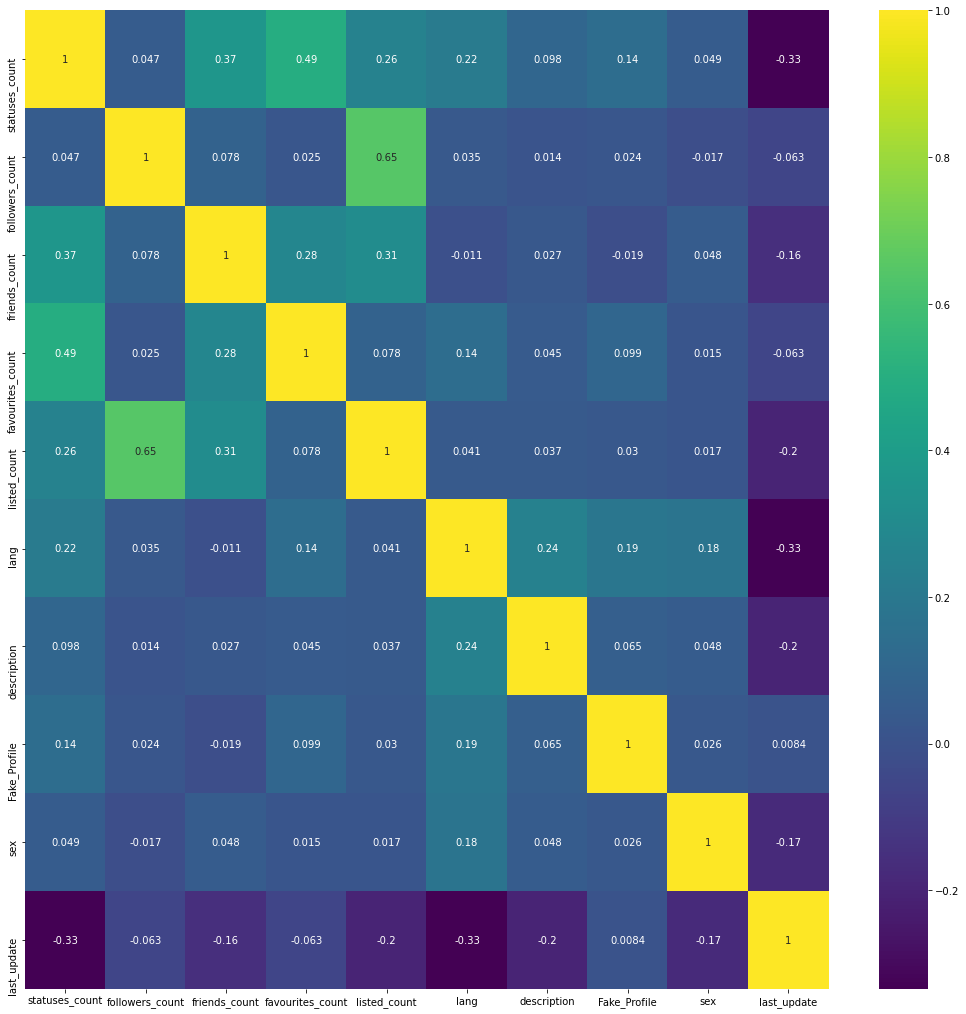

In [35]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

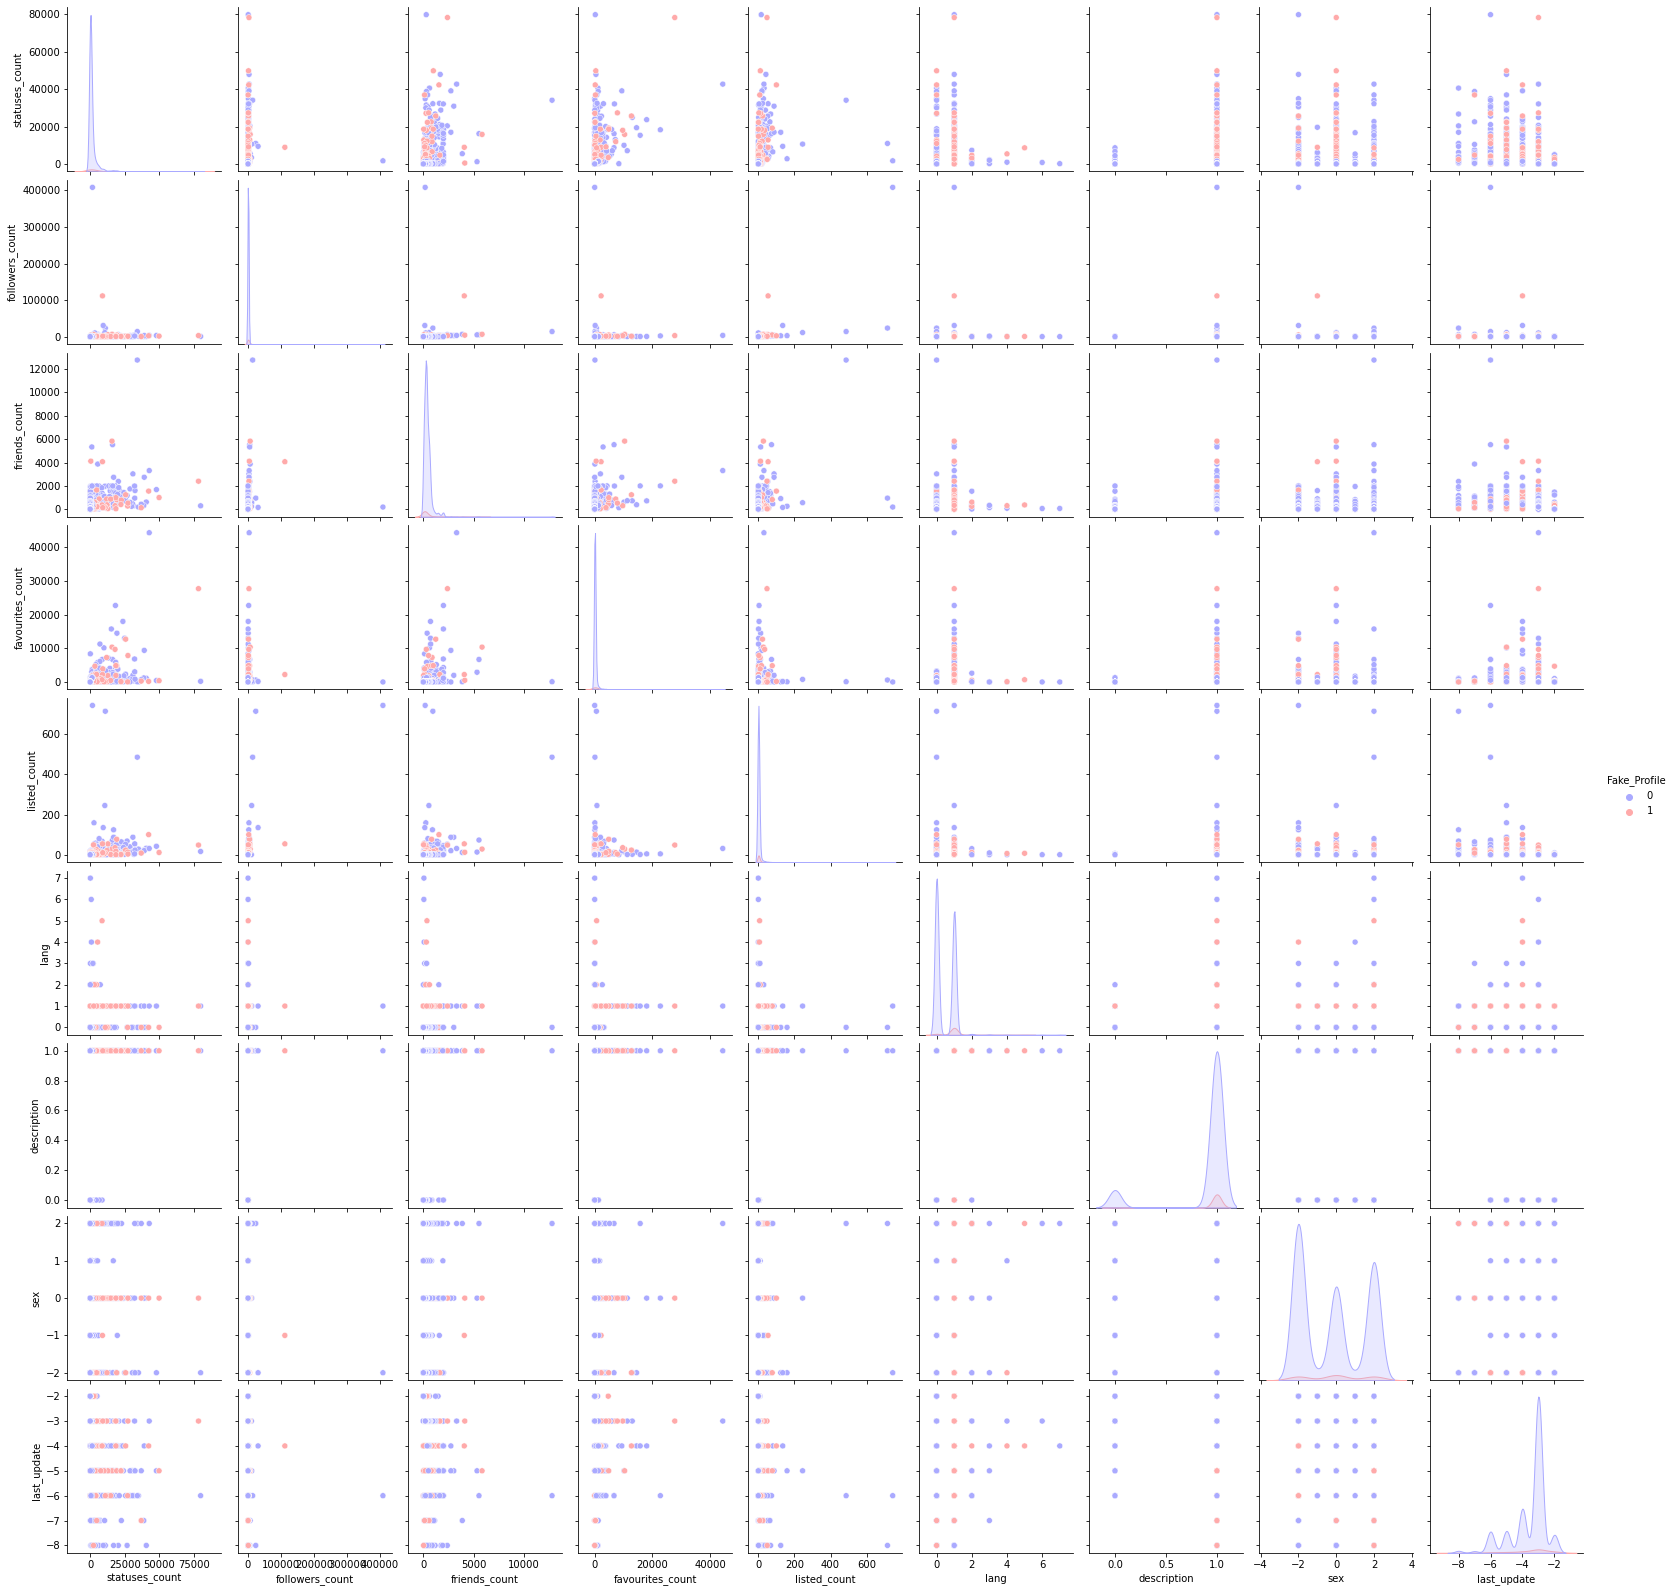

In [36]:
sns.pairplot(data,hue='Fake_Profile',palette='bwr')

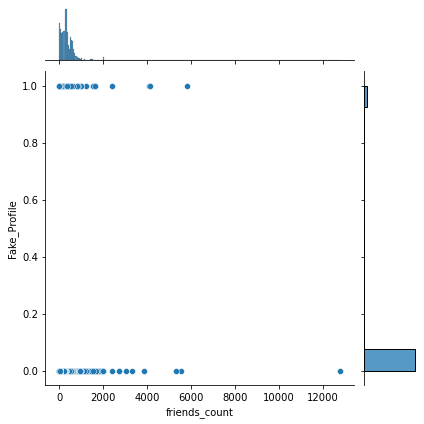

In [37]:
sns.jointplot(x='friends_count',y='Fake_Profile',data=data)

In [38]:
data.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'lang', 'description',
       'Fake_Profile', 'sex', 'last_update'],
      dtype='object')

# Split the data

In [39]:
x = data[['statuses_count', 'followers_count', 'friends_count','favourites_count', 
           'listed_count', 'lang', 'sex', 'last_update']]
y = data['Fake_Profile']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)


[0.17027772 0.17499791 0.19499855 0.15191515 0.09552683 0.06049924
 0.06273672 0.08904788]


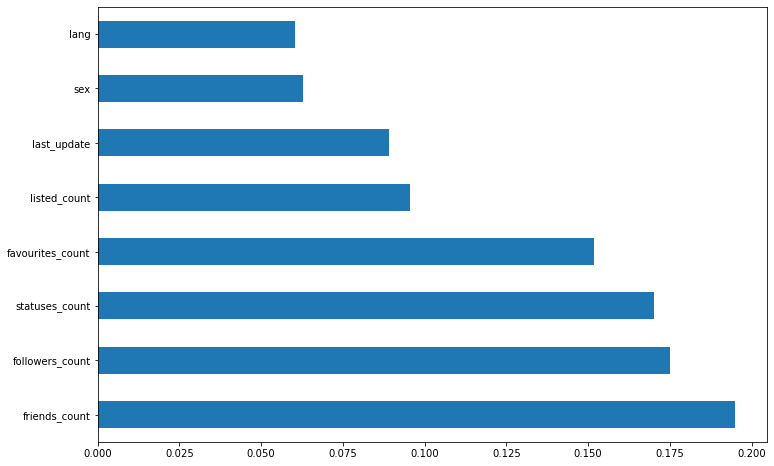

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)
print(selection.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Random Forest Classifier

In [41]:
#Train the model 

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=40,oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40, oob_score=True)

In [42]:
#Make the predictions on test data

y_pred = rf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       535
           1       0.50      0.03      0.06        29

    accuracy                           0.95       564
   macro avg       0.73      0.52      0.52       564
weighted avg       0.93      0.95      0.93       564



In [44]:
#Defining functions to evaluate model performance

from sklearn.model_selection import cross_val_score, learning_curve
import sklearn.metrics as metrics

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [45]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)

    print("False Positive rate: ",false_positive_rate)
    print("True Positive rate: ",true_positive_rate)


    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [47]:
cl_scores = cross_val_score(rf, X_train,y_train, cv=5)
print("Average Cross Validatin Score: ", cl_scores.mean())

Average Cross Validatin Score:  0.946761271249076


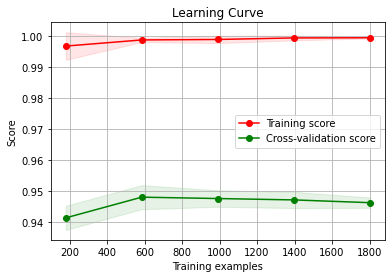

In [48]:
title = 'Learning Curve'
plot_learning_curve(rf, title, X_train, y_train, cv=5)
plt.show()

Confusion matrix, without normalization
[[534   1]
 [ 28   1]]


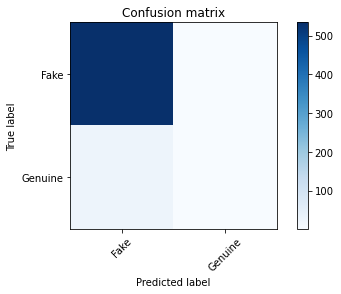

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)

Normalized confusion matrix
[[0.99813084 0.00186916]
 [0.96551724 0.03448276]]


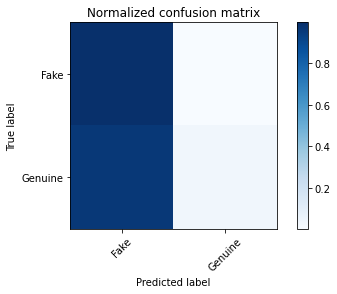

In [50]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [51]:
print(metrics.classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.95      1.00      0.97       535
     Genuine       0.50      0.03      0.06        29

    accuracy                           0.95       564
   macro avg       0.73      0.52      0.52       564
weighted avg       0.93      0.95      0.93       564



False Positive rate:  [0.         0.00186916 1.        ]
True Positive rate:  [0.         0.03448276 1.        ]


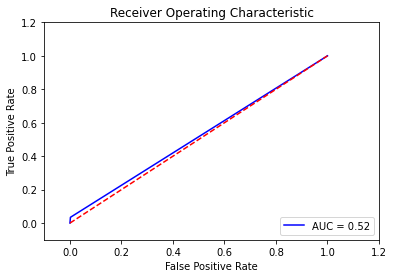

In [52]:
plot_roc_curve(y_test, y_pred)